Séries temporais em bases financeiras - Facebook **Prophet**

In [37]:
# intalação das bibliotecas 
!pip install fbprophet

In [38]:
from fbprophet import Prophet
import pandas as pd

In [39]:
#carregamento da base de dados
petro = pd.read_csv('petr4.csv' , usecols=['Date', 'Close'])
petro

,Date,Close
0,2016-07-21,11.85
1,2016-07-22,11.94
2,2016-07-25,12.03
3,2016-07-26,11.88
4,2016-07-27,11.51
...,...,...
1238,2021-07-14,27.67
1239,2021-07-15,27.08
1240,2021-07-16,26.68
1241,2021-07-19,26.24


In [40]:
# padrão do FBP precisa ser renomeada quando carrega a base de dados para o 
# algoritimo consiga fazer o aprendizagem
petro = petro[['Date', 'Close']].rename(columns = {'Date': 'ds', 'Close': 'y'})
petro

,ds,y
0,2016-07-21,11.85
1,2016-07-22,11.94
2,2016-07-25,12.03
3,2016-07-26,11.88
4,2016-07-27,11.51
...,...,...
1238,2021-07-14,27.67
1239,2021-07-15,27.08
1240,2021-07-16,26.68
1241,2021-07-19,26.24


In [41]:
petro.isnull().sum()

ds    0
y     4
dtype: int64

In [42]:
petro = petro.dropna(subset=['ds', 'y'])

In [43]:
petro.isnull().sum()

ds    0
y     0
dtype: int64

In [44]:
# construção do modelo e previsões
modelo = Prophet()
modelo.fit(petro)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
#essa função vai gerar um novo dataframe com previsões futuras
futuro = modelo.make_future_dataframe(periods=90)
previsoes = modelo.predict(futuro)


In [46]:
previsoes.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-07-21,13.507536,10.046358,15.909508,13.507536,13.507536,-0.647247,-0.647247,-0.647247,0.331909,0.331909,0.331909,-0.979157,-0.979157,-0.979157,0.0,0.0,0.0,12.860288
1,2016-07-22,13.509787,9.850099,15.693309,13.509787,13.509787,-0.698068,-0.698068,-0.698068,0.290414,0.290414,0.290414,-0.988482,-0.988482,-0.988482,0.0,0.0,0.0,12.811719
2,2016-07-25,13.516542,9.852419,15.517497,13.516542,13.516542,-0.663400,-0.663400,-0.663400,0.355837,0.355837,0.355837,-1.019237,-1.019237,-1.019237,0.0,0.0,0.0,12.853142
3,2016-07-26,13.518794,9.880357,15.693877,13.518794,13.518794,-0.660673,-0.660673,-0.660673,0.370734,0.370734,0.370734,-1.031406,-1.031406,-1.031406,0.0,0.0,0.0,12.858121
4,2016-07-27,13.521045,9.814884,15.923841,13.521045,13.521045,-0.662595,-0.662595,-0.662595,0.382464,0.382464,0.382464,-1.045059,-1.045059,-1.045059,0.0,0.0,0.0,12.858450


In [47]:
len(petro), len(previsoes)

(1239, 1329)

In [48]:
len(previsoes) - len(petro)

90

In [49]:
previsoes.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1239,2021-07-21,27.385036,23.690274,29.810003,27.385036,27.385036,-0.594376,-0.594376,-0.594376,0.382464,0.382464,0.382464,-0.976839,-0.976839,-0.976839,0.0,0.0,0.0,26.790660
1240,2021-07-22,27.401937,23.640205,29.669198,27.401937,27.401937,-0.654226,-0.654226,-0.654226,0.331909,0.331909,0.331909,-0.986135,-0.986135,-0.986135,0.0,0.0,0.0,26.747711
1241,2021-07-23,27.418837,23.767691,29.594111,27.418837,27.418837,-0.705229,-0.705229,-0.705229,0.290414,0.290414,0.290414,-0.995643,-0.995643,-0.995643,0.0,0.0,0.0,26.713609
1242,2021-07-24,27.435738,22.612445,28.435038,27.435738,27.435738,-1.871308,-1.871308,-1.871308,-0.865679,-0.865679,-0.865679,-1.005629,-1.005629,-1.005629,0.0,0.0,0.0,25.564430
1243,2021-07-25,27.452639,22.655738,28.521682,27.452639,27.452639,-1.882069,-1.882069,-1.882069,-0.865679,-0.865679,-0.865679,-1.016390,-1.016390,-1.016390,0.0,0.0,0.0,25.570570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,2021-10-14,28.821591,26.635908,32.584156,28.441436,29.126277,0.823290,0.823290,0.823290,0.331909,0.331909,0.331909,0.491381,0.491381,0.491381,0.0,0.0,0.0,29.644881
1325,2021-10-15,28.838492,27.100349,32.695236,28.448739,29.148883,0.909557,0.909557,0.909557,0.290414,0.290414,0.290414,0.619143,0.619143,0.619143,0.0,0.0,0.0,29.748049
1326,2021-10-16,28.855393,25.883574,31.557075,28.457454,29.173442,-0.122924,-0.122924,-0.122924,-0.865679,-0.865679,-0.865679,0.742755,0.742755,0.742755,0.0,0.0,0.0,28.732468
1327,2021-10-17,28.872293,26.086027,31.901003,28.466466,29.198803,-0.005047,-0.005047,-0.005047,-0.865679,-0.865679,-0.865679,0.860632,0.860632,0.860632,0.0,0.0,0.0,28.867246


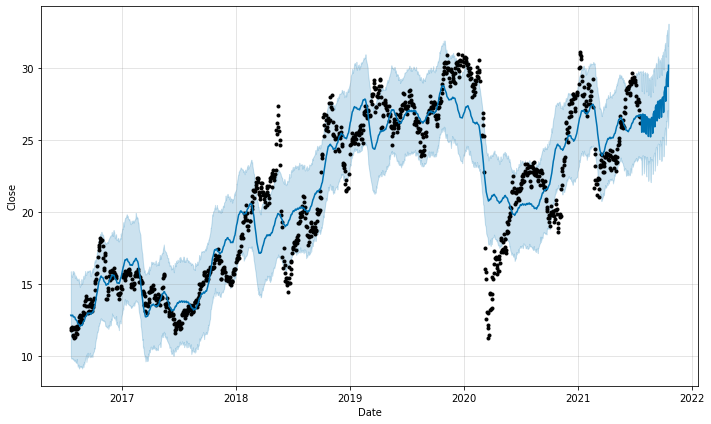

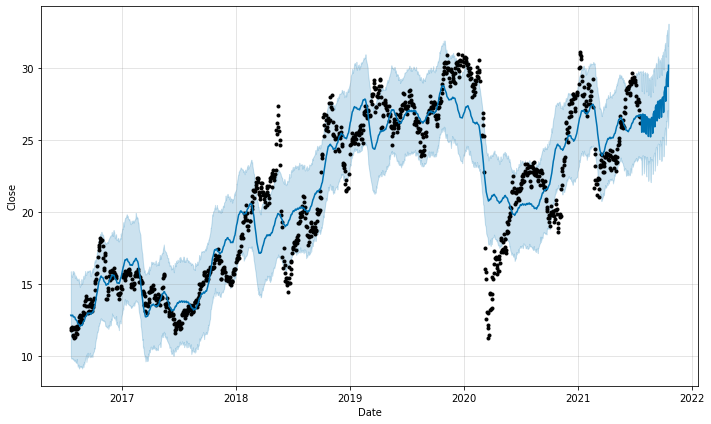

In [50]:
#grafico das previsões
modelo.plot(previsoes, xlabel = 'Date', ylabel = 'Close')

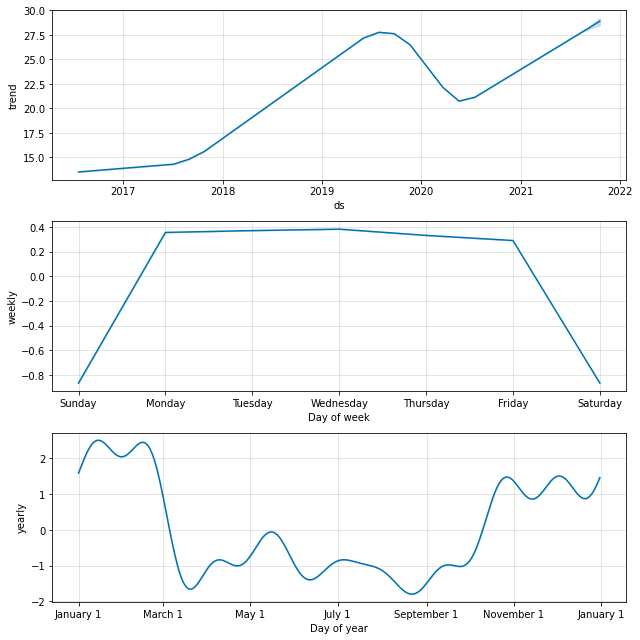

In [51]:
modelo.plot_components(previsoes);

In [52]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [53]:
plot_plotly(modelo, previsoes)

In [54]:
plot_components_plotly(modelo, previsoes)

In [55]:
#Avaliação


In [56]:
petro.shape

(1239, 2)

In [57]:
petro.tail()

,ds,y
1238,2021-07-14,27.67
1239,2021-07-15,27.08
1240,2021-07-16,26.68
1241,2021-07-19,26.24
1242,2021-07-20,26.59


In [58]:
pred = modelo.make_future_dataframe(periods=0)
previsoes = modelo.predict(pred)

In [59]:
previsoes.shape

(1239, 19)

In [60]:
previsoes.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1234,2021-07-14,27.266731,23.951736,29.390207,27.266731,27.266731,-0.522769,-0.522769,-0.522769,0.382464,0.382464,0.382464,-0.905233,-0.905233,-0.905233,0.0,0.0,0.0,26.743962
1235,2021-07-15,27.283632,23.686466,29.721863,27.283632,27.283632,-0.584491,-0.584491,-0.584491,0.331909,0.331909,0.331909,-0.916400,-0.916400,-0.916400,0.0,0.0,0.0,26.699142
1236,2021-07-16,27.300533,23.655117,29.751504,27.300533,27.300533,-0.636938,-0.636938,-0.636938,0.290414,0.290414,0.290414,-0.927352,-0.927352,-0.927352,0.0,0.0,0.0,26.663595
1237,2021-07-19,27.351235,23.789133,29.745022,27.351235,27.351235,-0.602183,-0.602183,-0.602183,0.355837,0.355837,0.355837,-0.958020,-0.958020,-0.958020,0.0,0.0,0.0,26.749052
1238,2021-07-20,27.368135,23.843299,29.898472,27.368135,27.368135,-0.596795,-0.596795,-0.596795,0.370734,0.370734,0.370734,-0.967528,-0.967528,-0.967528,0.0,0.0,0.0,26.771341


In [61]:
previsoes = previsoes['yhat'].tail(365)

In [62]:
previsoes

874     26.718656
875     26.555631
876     26.503101
877     26.453667
878     26.349046
          ...    
1234    26.743962
1235    26.699142
1236    26.663595
1237    26.749052
1238    26.771341
Name: yhat, Length: 365, dtype: float64

In [66]:
#mean_absolute_error(petro, previsoes)

In [69]:
petro = pd.read_csv('petr4.csv', usecols = ['Date', 'Close'])
petro = petro[['Date', "Close"]].rename(columns = {'Date': 'ds', 'Close': 'y'})
petro

,ds,y
0,2016-07-21,11.85
1,2016-07-22,11.94
2,2016-07-25,12.03
3,2016-07-26,11.88
4,2016-07-27,11.51
...,...,...
1238,2021-07-14,27.67
1239,2021-07-15,27.08
1240,2021-07-16,26.68
1241,2021-07-19,26.24


In [73]:
from fbprophet import Prophet
model = Prophet()
model.fit(petro)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
petro = petro[1081:]
petro.shape

(162, 2)

In [76]:
pred = model.make_future_dataframe(periods=0)
previsoes = model.predict(pred)

In [77]:
previsoes = previsoes['yhat'].tail(365)

In [78]:
previsoes

878     26.503101
879     26.453667
880     26.349046
881     26.261181
882     26.235709
          ...    
1238    26.743962
1239    26.699142
1240    26.663595
1241    26.749052
1242    26.771341
Name: yhat, Length: 365, dtype: float64

In [79]:
petro['y']

1081    23.820000
1082    25.100000
1083    26.219999
1084    26.250000
1085    25.820000
          ...    
1238    27.670000
1239    27.080000
1240    26.680000
1241    26.240000
1242    26.590000
Name: y, Length: 162, dtype: float64

In [80]:
#mean_absolute_error(petro['y'], previsoes)

NameError: ignored